1. Data Extraction and filtering

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv
/kaggle/input/chatsper/dataset/WhatsApp Chat with Hack it.txt
/kaggle/input/chatsper/dataset/whatsapp-chat-data.txt
/kaggle/input/chatsper/dataset/WhatsApp Chat with I.T. 3rd year unofficial.txt
/kaggle/input/chatsper/dataset/chat.csv
/kaggle/input/chatsper/dataset/WhatsApp Chat with Chuckaboo .txt
/kaggle/input/chatsper/dataset/WhatsApp Chat with IT -III YEAR (LATERAL ENTRY) 2023-2026.txt
/kaggle/input/chatsper/dataset/WhatsApp Chat with Unofficial Corro Health 14.txt
/kaggle/input/chatsper/dataset/WhatsApp Chat with Akansha Shishodia.txt
/kaggle/input/chatsper/dataset/WhatsApp Chat with Royal Pharmacy.txt
/kaggle/input/chatsper/dataset/WhatsApp Chat with IT Information.txt
/kaggle/input/chatsper/dataset/WhatsApp Chat with Mami.txt
/kaggle/input/chatsper/dataset/WhatsApp Chat with Didi Jio.txt
/kaggle/input/chatsper/dataset/WhatsApp Chat with Lateral Entry Group C V Raman Hostel 2023-26.txt
/kaggle/input/chatsper/dat

In [2]:
# libraries
import pandas as pd
import re
from collections import defaultdict

In [3]:
#function for filtering the whatsapp exported file 
def preprocess(file_path:str)->pd.DataFrame:
    encryption_message="Messages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share them. Learn more.\n"
    grppermission=r"\s*(.*) changed this group's settings to allow \s*(.*)"
    grpjoin=r"\s*(.*) joined using this group's link"
    grpjoin2=r"\s*(.*) joined using this group's invite link"
    media_pattern="<Media omitted>"
    email_pattern=r"[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}"
    url_pattern=r"https?://[^\s]+"
    edited_message="<This message was edited>"
    deleted_message="You deleted this message"
    grp_deleted="This message was deleted"
    null_message="null"
    created_group="created group"
    added_you="added you"
    tagging_pattern=r'@[\w]+'
    noti=r"Your security code with \s*(.*)"
    no_change=r"\s*(.*) changed their phone number to a new number. Tap to message or add the new number."
    vcfmsg=r".*?\.vcf \s*\(file attached\)"
    
    with open(file_path,'r') as f:
        lines=f.readlines()
    filtered_lines=[]
    for line in lines:
        if(encryption_message not in line and
           deleted_message not in line and
           grp_deleted not in line and
           null_message != line.split(" ")[-1] and
           media_pattern not in line and
           created_group not in line and
           added_you not in line and
           not re.search(email_pattern,line) and
           not re.search(url_pattern,line) and 
           not re.search(noti,line) and 
           not re.search(no_change,line) and not re.search(vcfmsg,line) and not re.search(grppermission,line)and not re.search(grpjoin,line) and not re.search(grpjoin2,line)):
            line=line.replace(edited_message,"").strip()
            line=re.sub(tagging_pattern,"",line).strip()
            filtered_lines.append(line)
    content='\n'.join(filtered_lines)
    content=content.replace('\u202f'," ")#clean invisible lines
    # print(content)
    
    #regex for message 
    
    pattern= r'(\d{2}/\d{2}/\d{4}), (\d{1,2}:\d{2}\s?[APMapm]{2}) - ([^:]+):\s*(.*)'
    pattern24= r'(\d{2}/\d{2}/\d{4}), (\d{2}:\d{2}) - ([^:]+):\s*(.*)'
    messages=re.findall(pattern,content)
    messages24=re.findall(pattern24,content)
    # print(messages)
    # print(messages24)
    combined=[(f"{d}, {t}",s,m) for d,t,s,m in messages]
    combined+=[(f"{d}, {t}",s,m) for d,t,s,m in messages24]
    df=pd.DataFrame(combined,columns=['timestamp','sender','message'])
    # df.insert(0,'id',range(0,len(df)))
    # df.set_index('id', inplace=True)
    #handling timestamp
    
    timestamps=[]
    for timestamp in df['timestamp']:
        try:
            timestamp=pd.to_datetime(
                timestamp,errors='coerce'
            )
        except Exception as e:
            print("error",e)
            timestamp=pd.NaT
        timestamps.append(timestamp)
    df['timestamp']=timestamps
    return df,combined

In [4]:
# dataset=pd.read_csv("/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv",encoding="ISO-8859-1")

In [5]:
file,c=preprocess("/kaggle/input/chatsper/dataset/WhatsApp Chat with Didi Jio.txt")
file2,c2=preprocess("/kaggle/input/chatsper/dataset/WhatsApp Chat with Kartikey Dubey.txt")
file3,c3=preprocess("/kaggle/input/chatsper/dataset/WhatsApp Chat with Akansha Shishodia.txt")
file4,c4=preprocess("/kaggle/input/chatsper/dataset/WhatsApp Chat with I.T. 3rd year unofficial.txt")
file5,c5=preprocess("/kaggle/input/chatsper/dataset/WhatsApp Chat with Hack it.txt")
file6,c6=preprocess("/kaggle/input/chatsper/dataset/WhatsApp Chat with IT -III YEAR (LATERAL ENTRY) 2023-2026.txt")
file7,c7=preprocess("/kaggle/input/chatsper/dataset/WhatsApp Chat with Mami.txt")
file8,c8=preprocess("/kaggle/input/chatsper/dataset/WhatsApp Chat with IT Information.txt")
file9,c9=preprocess("/kaggle/input/chatsper/dataset/WhatsApp Chat with Placement Information batch 2023.txt")
file10,c10=preprocess("/kaggle/input/chatsper/dataset/whatsapp-chat-data.txt")
file11,c11=preprocess("/kaggle/input/chatsper/dataset/WhatsApp Chat with Lateral Entry Group C V Raman Hostel 2023-26.txt")
file12,c12=preprocess("/kaggle/input/chatsper/dataset/WhatsApp Chat with Chuckaboo .txt")
file13,c13=preprocess("/kaggle/input/chatsper/dataset/WhatsApp Chat with Royal Pharmacy.txt")
file14,c14=preprocess("/kaggle/input/chatsper/dataset/WhatsApp Chat with Unofficial Corro Health 14.txt")
dataset=pd.concat([file,file2,file3,file4,file5,file6,file7,file8,file9,file10,file11,file12,file13,file14])
messages=c+c2+c3+c4+c5+c6+c7+c8+c9+c10+c11+c12+c13+c14


/tmp/ipykernel_35/335731600.py:61: UserWarning: Parsing dates in %d/%m/%Y, %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  timestamp=pd.to_datetime(
/tmp/ipykernel_35/335731600.py:61: UserWarning: Parsing dates in %d/%m/%Y, %H:%M am format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  timestamp=pd.to_datetime(
/tmp/ipykernel_35/335731600.py:61: UserWarning: Parsing dates in %d/%m/%Y, %H:%M pm format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  timestamp=pd.to_datetime(


In [6]:
dataset.shape

(57125, 3)

In [7]:
# dataset=dataset[dataset["sender"]=="$©# {IT}"]

In [8]:
dataset.head()

,timestamp,sender,message
0,2022-01-21 20:31:00,Didi Jio,Aaram se pahunch gyee nn
1,2022-01-21 20:31:00,Didi Jio,Tabiyat kaisi hh
2,2022-01-21 20:48:00,$©# {IT},Ha
3,2022-01-21 20:48:00,$©# {IT},Thik h
4,2022-01-21 21:02:00,Didi Jio,Axxaa


In [9]:
grouped_msg=[]
for _, sender, message in messages:
    if grouped_msg and grouped_msg[-1]["sender"]==sender:
        grouped_msg[-1]["message"]+="\n"+message
    else:
        grouped_msg.append({
            "sender": sender,
            "message": message
        })
print('done')


done


In [10]:
# Define special tokens
start_of_text_token = "<|startoftext|>"
end_of_text_token = "<|endoftext|>"
separator_token = "<|separator|>"

fine_tuning_data = []

for message in grouped_msg:
    sender = message["sender"]
    message_text = message["message"]
    input_sequence = f"{start_of_text_token}{sender}{separator_token}{message_text}{end_of_text_token}"
    fine_tuning_data.append(input_sequence)

len(fine_tuning_data)

37136

In [11]:
import json

save_path = "/kaggle/working/fine_tuning.json"
with open(save_path, 'w', encoding='utf-8') as f:
    json.dump(fine_tuning_data, f, ensure_ascii=False, indent=4)

output

In [12]:
text_seq=(" ").join(dataset["message"])


In [13]:
len(text_seq)

1357381

In [14]:
# text_seq

manual bpe

In [15]:
# def preprocess_text(text_seq):
#     text_seq.lower()
#     texta_seq=re.sub(r'[^\w\s]','',text_seq)
#     texts=text_seq.split()
#     return texts
# #intial vocab
# def get_vocab(corpus):
#     vocab = defaultdict(int) # defautdict is a data structure which help in avoiding key error if unique word enter then the intialize its freq to zero so we can easily increase it
#     for word in corpus:
#         chars = ' '.join(list(word)) + ' </w>'  # Add </w> to mark end of word
#         vocab[chars] += 1
#     return vocab
# # vocab=get_vocab(texts)
# # print(len(vocab))
# #count freq of adjecent symbol pairs
# def get_stats(vocab):
#     pairs=defaultdict(int)
#     for word,freq in vocab.items():
#         symbols=word.split()
#         for i in range(len(symbols)-1):
#             pair=(symbols[i],symbols[i+1])
#             pairs[pair]+=freq
#     return max(pairs,key=pairs.get), max(pairs.values())
# # pair=get_stats(vocab)
# # print(pair)
# #merge
# def merge_vocab(pair, vocab):
#     pattern = re.escape(' '.join(pair))
#     replacement = ''.join(pair)
#     new_vocab = {}
#     for word in vocab:
#         new_word = re.sub(pattern, replacement, word)
#         new_vocab[new_word] = vocab[word]
#     return new_vocab
# # result=merge_vocab(pair[0],vocab)
# # print(result)
# def bpe(corpus, num_merges=10):
#     vocab = get_vocab(corpus)
#     print("Initial Vocabulary:")
#     for word in vocab:
#         print(word)
#     print("\nStarting BPE Merges:\n")
#     for i in range(num_merges):
#         pair, freq = get_stats(vocab)
#         if not pair:
#             break
#         print(f"Merge #{i+1}: {pair} -> {''.join(pair)} (Frequency: {freq})")
#         vocab = merge_vocab(pair, vocab)
#     return vocab
# corpus=preprocess_text(text_seq)
# result=bpe(corpus,num_merges=11)
# result

In [16]:
!pip install tiktoken

In [17]:
# # Automate BPE
# from minbpe import BasicTokenizer

# vocab_size = 1234
# blocksize = 256
# chunk_size = 900000
# tokenizer = BasicTokenizer()
# tokenizer.train(text_seq[:chunk_size],vocab_size)
# vocab=tokenizer.vocab
# print(f"Vocab size: {len(vocab)}")
# vocab
# tokenizer.encode('hi')
# # isko todega phir token wala no assign karega
# tokenizer.decode([83, 104, 524, 103, 271, 364, 104])
# max_vocab_id = list(tokenizer.vocab.keys())[-1]
# print(max_vocab_id)
# tokenizer.special_tokens = {
#     "<|startoftext|>": max_vocab_id + 1,
#     "<|separator|>": max_vocab_id + 2,
#     "<|endoftext|>": max_vocab_id + 3,
#     "<|unk|>": max_vocab_id + 4,
#     "<|padding|>": max_vocab_id + 5,
# }
# chunk_size=100000
# tokens = []
# for i in range(0, len(text_seq), chunk_size):
#     print(i)
#     chunk = text_seq[i:i + chunk_size]
#     tokens.extend(tokenizer.encode(chunk))

# print(f"Total tokens generated: {len(tokens)}")
# sys.path.append('/kaggle/working/output')
# tokenizer.save(file_prefix="/kaggle/working/my_tokenizer2")

In [18]:
# tokenizer.save(file_prefix="/kaggle/working/my_tokenizer2")

In [19]:
import sys
sys.path.append('/kaggle/input/ccccccc')

In [20]:
from minbpe import BasicTokenizer

tokenizer = BasicTokenizer()
tokenizer.load(model_file="/kaggle/input/tokenizer/other/default/1/my_tokenizer.model")

In [21]:
def get_vocab_size(tokenizer:BasicTokenizer):
    vocab_size=len(tokenizer.vocab)
    special_token=len(tokenizer.special_tokens)
    return vocab_size+special_token

In [22]:
get_vocab_size(tokenizer)

1244

Transformer



The Transformer's key innovation is its reliance entirely on attention mechanisms, specifically self-attention, rather than recurrence or convolutions. This allows it to:

Process data in parallel: Unlike RNNs, the Transformer can process all parts of an input sequence simultaneously. This significantly speeds up training and inference, enabling the training of much larger models on massive datasets.

Capture long-range dependencies effectively: The self-attention mechanism allows each element in a sequence to "attend" to (or weigh the importance of) every other element in the sequence, regardless of their distance. This directly addresses the vanishing gradient problem that plagued RNNs when dealing with long sequences.

Key Components of a Transformer:
While the original Transformer had an Encoder-Decoder structure, many modern applications (like your GPT model) use only the Decoder part. Here are the core components:

Self-Attention Mechanism (and Multi-Head Attention):

This is the heart of the Transformer. For each word (or token) in a sequence, it calculates how much "attention" it should pay to every other word in the same sequence.
It does this by transforming each word's embedding into three learned vectors: a Query (Q), a Key (K), and a Value (V).
The attention score is calculated by taking the dot product of the Query with all Keys, scaling it, and then applying a softmax function to get probabilities.
These probabilities are then used to create a weighted sum of the Value vectors, producing a new, context-aware representation for the word.
Multi-Head Attention extends this by running several attention mechanisms in parallel, each learning different types of relationships. Their outputs are then concatenated and linearly transformed.

Positional Encoding:

Since the Transformer processes sequences in parallel, it loses the inherent positional information that RNNs (which process sequentially) naturally have.
To compensate, positional encodings (vectors) are added to the input word embeddings. These encodings carry information about the position of each word in the sequence.

Feed-Forward Network (FFN):

A simple, two-layer neural network applied independently to each position in the sequence. It helps the model to further process the information derived from the attention mechanism.

Residual Connections:

After each sub-layer (e.g., self-attention, feed-forward), a residual connection is added. This means the input to the sub-layer is added to its output. This helps with training very deep networks by allowing gradients to flow more easily.

Layer Normalization:

Applied after the residual connections. It normalizes the activations across the features for each sample, helping to stabilize and speed up training.
How it Works (Simplified):
Input Preparation: Input text is first converted into numerical tokens, which are then mapped to dense token embeddings.
Positional Information: To these token embeddings, positional encodings are added, providing information about the order of words.
Transformer Blocks: This combined representation passes through multiple stacked Transformer Blocks. Each block performs: 
Multi-Head Self-Attention: Each word interacts with every other word in the sequence to determine contextual relevance.
Feed-Forward Network: The output of attention is further processed.
(Residual connections and Layer Normalization are applied throughout.)
Output: The final output of the stack of Transformer Blocks is then passed through a final linear layer (and often a softmax) to predict the probabilities of the next word in the sequence (for language models) or to generate outputs for other tasks.

In [23]:
import torch
torch.manual_seed(4893)
# hyperparameters
# Transformer model hyperparameters
block_size = 256
batch_size=128# Maximum context length for each input sequence
n_embd = 256        # Embedding size (dimension of each token's vector)
n_head = 4         # Number of attention heads
n_layer = 4          # Number of transformer layers
dropout = 0.2        # Dropout rate for regularization
vocab_size=get_vocab_size(tokenizer)
device='cuda' if torch.cuda.is_available() else 'cpu'
#head 
from typing import Optional, Tuple
import torch
import torch.nn as nn
import torch.nn.functional as F

class Head(nn.Module):#small brain
    """ One Head of Self-Attention"""
    def __init__(self,head_size:int):
        super().__init__()# It connects code to PyTorch’s engine.
        # A Query vector: what am I looking for?
        # A Key vector: what do I offer?
        # A Value vector: what info do I carry?
        self.key=nn.Linear(n_embd,head_size,bias=False)
        self.query=nn.Linear(n_embd,head_size,bias=False)
        self.value=nn.Linear(n_embd,head_size,bias=False)
        self.register_buffer('tril',torch.tril(torch.ones(block_size,block_size)))#“Only look at this word and the ones before it — not ahead.”self.tril: A lower triangular matrix to mask out future tokens (causal attention).
        self.dropout=nn.Dropout(dropout)#randomly turning off a few brain cells while learning.
        #To avoid overthinking or memorizing everything. It's a trick to help the model generalize better.
        self.head_size=head_size
    def forward(self,x:torch.Tensor)->torch.Tensor:
        _,T,_=x.shape#[batch_size, T, n_embd]
        k=self.key(x)#Transforms the input into a key vector for each word.
        q=self.query(x)#Transforms the input into a query vector for each word.
        weights=q@k.transpose(-2,-1)*k.shape[-1]**-0.5   #@ is matrix multiplication.
        #This is the attention score. It tells us how much each word should pay attention to every other word.
        weights=weights.masked_fill(self.tril[:T,:T]==0,float('-inf'))#This hides the future. 
        weights=F.softmax(weights,dim=-1)#"How much should I pay attention to each word?" 
        weights=self.dropout(weights)#Drop some attention values to avoid overfitting (same as before).
        v=self.value(x)#Now we get the actual information from each word (value vector).
        out=weights@v#“Give me a mix of values, based on how much I should pay attention to each one.”
        return out
    
    
# multihead attention
# The idea is to have multiple heads of attention, each focusing on different parts of the input.
class MultiHeadAttention(nn.Module):
    """Multiple heads of self attention in parallel"""
    def __init__(self,num_heads:int,head_size:int):
        super().__init__()
        self.heads=nn.ModuleList([Head(head_size) for _ in  range(num_heads)]) #This creates a list of heads, each with its own set of parameters. 
        self.projection=nn.Linear(num_heads*head_size,n_embd) #This combines the outputs of all heads into a single vector.
        self.dropout=nn.Dropout(dropout) #This randomly turns off some neurons to prevent overfitting.
    def forward(self,x:torch.Tensor)->torch.Tensor:
        out=torch.cat([h(x) for h in self.heads],dim=-1)    #This concatenates the outputs of all heads into a single tensor.
        out=self.projection(out) #This combines the outputs of all heads into a single vector.
        out=self.dropout(out) #This randomly turns off some neurons to prevent overfitting.
        return out
    
    
# Block
# A block is a self-attention layer followed by a feed-forward layer
class FeedForward(nn.Module):
    """A simple linear layer followed by a non-linearity""" 
    def __init__(self,n_embd:int):
        super().__init__()
        self.net=nn.Sequential(#This creates a sequence of layers to process the input. 
            nn.Linear(n_embd,n_embd*4),#This expands the input to a larger size.
            nn.ReLU(),#This applies a non-linear activation function to the input.
            nn.Linear(n_embd*4,n_embd),#This reduces the size back to the original embedding size.
            nn.Dropout(dropout)
        )
    def forward(self,x:torch.Tensor)->torch.Tensor:
        return self.net(x)#This applies the feed-forward network to the input.
    
class Block(nn.Module):#This is a single transformer block
    """ Transformer Block: Self-Attention + Feed Forward"""
    def __init__(self,n_embd:int,n_head:int):
        super().__init__()
        head_size=n_embd//n_head#This is the size of each attention head.
        self.self_attention=MultiHeadAttention(n_head,head_size)#This is the multi-head attention layer. 
        # It allows the model to focus on different parts of the input simultaneously.
        # It takes the number of heads and the size of each head as input.
        self.feed_forward=FeedForward(n_embd) #This is the feed-forward layer.
        # It processes the output of the attention layer. 
        self.layer_norm_1=nn.LayerNorm(n_embd) #This normalizes the output of the attention layer.
        # It helps stabilize the training process.
        self.layer_norm_2=nn.LayerNorm(n_embd) #This normalizes the output of the feed-forward layer.
        # It helps stabilize the training process. 
    def forward(self,x:torch.Tensor)->torch.Tensor:
        x=self.layer_norm_1(x+self.self_attention(x)) #This adds the output of the attention layer to the input (residual connection) and normalizes it.
        # This helps the model learn better by allowing gradients to flow through the network.
        x=self.layer_norm_2(x+self.feed_forward(x)) #This adds the output of the feed-forward layer to the input (residual connection) and normalizes it.
        return x 
    
    
# Assembling the model
class GPTLanguageModel(nn.Module):
    """ The full GPT Language Model"""
    def __init__(self):
        # vocab_size: size of the vocabulary
        # n_embd: size of the embedding vector
        # n_layer: number of transformer blocks
        # n_head: number of attention heads
        # block_size: maximum context length for each input sequence
        # This is the main class that combines all the components of the model. It initializes the token and position embeddings, the transformer blocks, and the final linear layer.
        super().__init__()
        self.device=device
        # self.ignore_index=ignore_index
        self.block_size=block_size
        self.n_embd=n_embd
        self.n_head=n_head
        self.token_embedding=nn.Embedding(vocab_size,n_embd) #This creates an embedding layer for the input tokens.
        # It maps each token to a vector of size n_embd.
        # The embedding layer is a lookup table that stores the embeddings for each token in the vocabulary.
        self.position_embedding=nn.Embedding(block_size,n_embd) #This creates an embedding layer for the position of each token in the input sequence.
        # It maps each position to a vector of size n_embd.
        self.blocks=nn.Sequential(*[Block(n_embd,n_head) for _ in range(n_layer)]) #This creates a sequence of transformer blocks.
        # Each block consists of a multi-head attention layer and a feed-forward layer. 
        self.final_layer_norm=nn.LayerNorm(n_embd) #This normalizes the output of the transformer blocks.
        # It helps stabilize the training process.
        self.final_linear_layer=nn.Linear(n_embd,vocab_size) #This creates a linear layer that maps the output of the transformer blocks to the vocabulary size.
        self.apply(self._init_weights) #This initializes the weights of the model.
        # It uses a normal distribution with mean 0 and standard deviation 0.02 for the weights.
        
    def _init_weights(self,module): #This function initializes the weights of the model.
        """ Initialize the weights of the model """
        if isinstance(module,nn.Linear): #This checks if the module is a linear layer. 
            # If it is, it initializes the weights using a normal distribution.
            torch.nn.init.normal_(module.weight,mean=0.0,std=0.02)
            if module.bias is not None: #This checks if the linear layer has a bias term.
                # If it does, it initializes the bias to zero.
                torch.nn.init.zeros_(module.bias)
        elif isinstance(module,nn.Embedding): #This checks if the module is an embedding layer. 
            torch.nn.init.normal_(module.weight,mean=0.0,std=0.02) 
            # torch.nn.init.zeros_(module.weight)
    def forward(self,input_tokens,targets=None)->Tuple[torch.Tensor,Optional[torch.Tensor]]:
        """ forward pass of the model
        input_tokens: Tensor of input token indices of shape (batch_size, sequence_length)
        targets: target token ids (for training)
        returns: tuples of (logits, loss) where logits of shape (batch_size, block_size, vocab_size) and loss is the optional cross-entropy loss
        """
        B,T=input_tokens.shape #batch size and sequence length
        token_embeddings=self.token_embedding(input_tokens)
        position_embeddings=self.position_embedding(torch.arange(T,device=device)) #This creates a tensor of position indices for the input sequence.
        x=token_embeddings+position_embeddings #This adds the token and position embeddings together. shape (B,T,n_embd)
        x=self.blocks(x) #This applies the transformer blocks to the input embeddings. shape (B,T,n_embd)
        x=self.final_layer_norm(x) #This applies layer normalization to the output of the transformer blocks. shape (B,T,n_embd)
        logits=self.final_linear_layer(x) #This applies a linear layer to the output of the transformer blocks. shape (B,T,vocab_size) 
        # logits=logits.view(B*T,-1) #This reshapes the output to (B*T,vocab_size) for loss calculation.
        if targets is None:
            loss=None
        else:
            B,T,V=logits.shape #This gets the shape of the logits tensor. B-batch size, T-sequence length, V-vocab size
            logits=logits.view(B*T,V)
            targets=targets.view(B*T)
            loss=F.cross_entropy(logits,targets)
        return logits,loss
    def generate(self,input_tokens:torch.Tensor,max_new_tokens:int)->torch.Tensor:
        # This function generates new tokens based on the input tokens. 
        # It uses the model to predict the next token in the sequence and appends it to the input tokens.
        # This process is repeated for the specified number of new tokens.
        # input_tokens: Tensor of input token indices of shape (batch_size, sequence_length)
        # max_new_tokens: number of new tokens to generate
        # returns: Tensor of generated token indices of shape (batch_size, sequence_length + max_new_tokens)
        
        for _ in range(max_new_tokens): 
            cropped_input=input_tokens[:,-block_size:] #This ensures that the input sequence does not exceed the maximum context length.
            # This is the main part of the generation process. It uses the model to predict the next token in the sequence.
            logits,_=self(cropped_input)
            # logits=logits[:,-1,:] #This selects the last token in the sequence for prediction.
            logits=logits[:,-1,:] #This selects the last token in the sequence for prediction.
            probs=F.softmax(logits,dim=-1) #This applies the softmax function to the logits to get probabilities for each token in the vocabulary.
            idx_next=torch.multinomial(probs,num_samples=1) #This samples the next token from the predicted probabilities.
            input_tokens=torch.cat((input_tokens,idx_next),dim=1) #This appends the predicted token to the input sequence.
        return input_tokens 
model=GPTLanguageModel()
model.to(device)
print(sum(p.numel() for p in model.parameters())/1e6)



3.860188


In [24]:
def print_summary(model:torch.nn.Module, indent:str=''):
    """Prints a summary of the model architecture and the number of parameters in each layer."""
    for name, child in model.named_children():
        params= sum(p.numel() for p in child.parameters())
        print(f"{indent}|--{name}: {child.__class__.__name__}({params:,}parameters)")
        print_summary(child, indent + '    ')
print_summary(model)
def get_model_stats(model:torch.nn.Module):
    """Returns a DataFrame containing the model architecture and the number of parameters in each layer."""
    stats=[]
    for name,module in model.named_modules():
        if len(list(module.children()))==0:
            params=sum(p.numel() for p in module.parameters())
            stats.append({'Layer Name':name,'Type':module.__class__.__name__,'Parameters':params,'Trainable':sum(p.numel() for p in module.parameters() if p.requires_grad)})
    return pd.DataFrame(stats)
        
stats_df=get_model_stats(model)

# stats_df.to_excel('./output/transformer_stats.xlsx',index=False)

|--token_embedding: Embedding(318,464parameters)
|--position_embedding: Embedding(65,536parameters)
|--blocks: Sequential(3,155,968parameters)
    |--0: Block(788,992parameters)
        |--self_attention: MultiHeadAttention(262,400parameters)
            |--heads: ModuleList(196,608parameters)
                |--0: Head(49,152parameters)
                    |--key: Linear(16,384parameters)
                    |--query: Linear(16,384parameters)
                    |--value: Linear(16,384parameters)
                    |--dropout: Dropout(0parameters)
                |--1: Head(49,152parameters)
                    |--key: Linear(16,384parameters)
                    |--query: Linear(16,384parameters)
                    |--value: Linear(16,384parameters)
                    |--dropout: Dropout(0parameters)
                |--2: Head(49,152parameters)
                    |--key: Linear(16,384parameters)
                    |--query: Linear(16,384parameters)
                    |--value: 

In [25]:
import torch
torch.manual_seed(4893)


In [26]:
print(device)

cuda


In [27]:
model=GPTLanguageModel().to(device)
model=torch.compile(model)


In [28]:
import json
# with open("./output/text_seq.txt", "r",encoding='utf-8') as f:
#     text_sequence= f.read()

# encoded_text_sequence = tokenizer.encode(fine_tuning_data)
# sys.path.append('/kaggle/working/output')
# with open("/kaggle/working/encoded_data.txt", "w") as f:
#     json.dump(encoded_text_sequence, f)
sys.path.append('/')
with open("/kaggle/input/encoded/encoded_data.txt","r") as f:
    encoded_text_sequence=json.load(f)
encoded_text_sequence

[286,
 329,
 407,
 257,
 522,
 785,
 493,
 1224,
 256,
 1149,
 70,
 425,
 101,
 986,
 398,
 98,
 658,
 469,
 788,
 287,
 385,
 305,
 109,
 717,
 99,
 897,
 435,
 281,
 1113,
 1000,
 257,
 576,
 616,
 108,
 1114,
 331,
 626,
 274,
 66,
 326,
 104,
 677,
 75,
 277,
 105,
 298,
 265,
 346,
 455,
 118,
 306,
 109,
 529,
 1182,
 328,
 633,
 347,
 275,
 274,
 77,
 265,
 436,
 580,
 406,
 304,
 53,
 48,
 37,
 261,
 678,
 348,
 299,
 508,
 361,
 400,
 98,
 476,
 664,
 335,
 399,
 111,
 372,
 518,
 782,
 552,
 258,
 287,
 298,
 262,
 305,
 441,
 541,
 360,
 921,
 256,
 342,
 110,
 877,
 119,
 364,
 101,
 813,
 799,
 460,
 283,
 488,
 367,
 339,
 1037,
 310,
 388,
 274,
 553,
 109,
 294,
 491,
 274,
 978,
 535,
 320,
 720,
 101,
 412,
 957,
 280,
 493,
 681,
 404,
 513,
 817,
 272,
 266,
 101,
 439,
 75,
 119,
 311,
 364,
 101,
 320,
 367,
 363,
 399,
 111,
 372,
 99,
 348,
 119,
 261,
 78,
 285,
 264,
 281,
 1025,
 103,
 323,
 1075,
 76,
 84,
 114,
 421,
 371,
 101,
 466,
 1124,
 865,
 448,
 98

In [29]:
len(encoded_text_sequence)

48137837

In [30]:
data=torch.tensor(encoded_text_sequence,dtype=torch.long)
split_index=int(0.9*len(data))
train_data=data[:split_index]
val_data=data[split_index:]

In [31]:
val_data

tensor([1104,  115,  268,  ...,   52,   72,   32])

In [32]:
from typing import Tuple
def get_batch(split: str) -> Tuple[torch.Tensor, torch.Tensor]:
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    index = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in index])
    y = torch.stack([data[i+1:i+block_size+1] for i in index])
    x, y = x.to(device), y.to(device)
    return x, y
x, y = get_batch('train')
x.shape, y.shape

(torch.Size([128, 256]), torch.Size([128, 256]))

In [33]:
from typing import Tuple
from torch.utils.data import Dataset, DataLoader

class TextDataset(Dataset):
    def __init__(self, data: torch.Tensor, block_size: int) -> None:
        self.data = data
        self.block_size = block_size

    def __len__(self) -> int:
        return len(self.data) - self.block_size

    def __getitem__(self, index: int) -> Tuple[torch.Tensor, torch.Tensor]:
        x = self.data[index:index + self.block_size]
        y = self.data[index + 1:index + self.block_size + 1]
        return x, y

def get_dataloaders(
        train_data: torch.Tensor,
        val_data: torch.Tensor,
        block_size: int,
        batch_size: int,
        device: torch.device
) -> Tuple[DataLoader, DataLoader]:
    train_dataset = TextDataset(train_data.to(device), block_size)
    val_dataset = TextDataset(val_data.to(device), block_size)

    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
    )
    val_loader = DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False,
    )

    return train_loader, val_loader

 
train_loader,val_loader=get_dataloaders(
    train_data=train_data,
    val_data=val_data,
    block_size=block_size,
    batch_size=64,
    device=device
)
x,y=next(iter(train_loader))
print(x,y)


tensor([[ 353,  116,  737,  ...,  120,   65,  275],
        [1010,  376, 1010,  ...,  109,  112,  115],
        [ 432,  320,  746,  ...,  689,  342,  838],
        ...,
        [ 101,  785,  655,  ..., 1144,  513,  520],
        [ 467,  815,  276,  ...,  353,  422,  429],
        [ 273,  694,  433,  ...,  118,  267,   77]], device='cuda:0') tensor([[ 116,  737,   63,  ...,   65,  275,   84],
        [ 376, 1010,  701,  ...,  112,  115,  360],
        [ 320,  746,  324,  ...,  342,  838,  436],
        ...,
        [ 785,  655,  452,  ...,  513,  520,  322],
        [ 815,  276,  365,  ...,  422,  429, 1134],
        [ 694,  433,  579,  ...,  267,   77,  256]], device='cuda:0')


In [34]:
from typing import Dict

eval_iters = 200


@torch.no_grad()
def estimate_loss() -> Dict:
    output = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            x, y = get_batch(split)
            _, loss = model(x, y)
            losses[k] = loss.item()
        output[split] = losses.mean()
    model.train()
    return output

In [35]:
def save_checkpoint(
    model: GPTLanguageModel,
    optimizer: torch.optim.Optimizer,
    epoch: int,
    loss: float,
    file_path: str = "checkpoint.pth"
) -> None:
    checkpoint = {
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': loss
    }
    torch.save(checkpoint, file_path)

In [37]:
max_iters = 500
eval_interval = 10
learning_rate = 1e-4
save_interval = 100
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

train_losses = []
val_losses = []

for iteration in range(max_iters):
    if iteration % eval_interval == 0 or iteration == max_iters - 1:
        losses = estimate_loss()
        print(
            f"step {iteration}: "
            f"train loss {losses['train']:.4f}, "
            f"val loss {losses['val']:.4f}"
        )
        train_losses.append(losses['train'])
        val_losses.append(losses['val'])

    x_batch, y_batch = get_batch('train')
    logits, loss = model(x_batch, y_batch)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

    if iteration % save_interval == 0:
        save_checkpoint(
            model=model,
            optimizer=optimizer,
            epoch=iteration,
            loss=loss.item(),
            file_path=f"/kaggle/working/checkpoint_{iteration}.pth"
        )

step 0: train loss 7.1778, val loss 7.1779
step 10: train loss 6.9585, val loss 6.9527
step 20: train loss 6.7069, val loss 6.6920
step 30: train loss 6.5621, val loss 6.5424
step 40: train loss 6.4715, val loss 6.4478
step 50: train loss 6.4172, val loss 6.3905
step 60: train loss 6.3846, val loss 6.3544
step 70: train loss 6.3591, val loss 6.3288
step 80: train loss 6.3344, val loss 6.3018
step 90: train loss 6.3031, val loss 6.2715
step 100: train loss 6.2607, val loss 6.2279
step 110: train loss 6.1954, val loss 6.1633
step 120: train loss 6.1063, val loss 6.0748
step 130: train loss 6.0095, val loss 5.9775
step 140: train loss 5.9155, val loss 5.8844
step 150: train loss 5.8290, val loss 5.7978
step 160: train loss 5.7510, val loss 5.7196
step 170: train loss 5.6803, val loss 5.6488
step 180: train loss 5.6173, val loss 5.5852
step 190: train loss 5.5595, val loss 5.5271
step 200: train loss 5.5069, val loss 5.4757
step 210: train loss 5.4608, val loss 5.4281
step 220: train loss 

In [ ]:
# max_iters = 1
# eval_interval = 100
# eval_iters = 200
# learning_rate = 3e-4

# optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
# train_loader, val_loader = get_dataloaders(
#     train_data=train_data,
#     val_data=val_data,
#     block_size=block_size,
#     batch_size=64,
#     device=device
# )

# train_losses = []
# val_losses = []

# for iteration in range(max_iters):
#     for batch_idx, (x_batch, y_batch) in enumerate(train_loader):
#         # Evaluation
#         if batch_idx % eval_interval == 0 or batch_idx == len(train_loader) - 1:
#             losses = estimate_loss(
#                 model=model,
#                 train_loader=train_loader,
#                 val_loader=val_loader,
#                 eval_iters=min(eval_iters, len(val_loader))
#             )
#             train_losses.append(losses['train'])
#             val_losses.append(losses['val'])

#             print(
#                 f"iteration {iteration} / step {batch_idx}: "
#                 f"train loss {losses['train']:.4f}, "
#                 f"val loss {losses['val']:.4f}"
#             )

#         # Training step
#         logits, loss = model(x_batch, y_batch)
#         optimizer.zero_grad(set_to_none=True)
#         loss.backward()
#         optimizer.step()

#     # Save checkpoint
#     save_checkpoint(
#         model=model,
#         optimizer=optimizer,
#         epoch=iteration,
#         loss=loss.item(),
#         file_path=f"../output/pre_training/run_4/checkpoint_{iteration}.pth"
#     )

In [38]:
input_tokens = tokenizer.encode("what is the mood")
input_tokens = torch.tensor(
    input_tokens, dtype=torch.long).unsqueeze(0).to(device)

model.eval()
with torch.no_grad():
    output = model.generate(input_tokens=input_tokens, max_new_tokens=100)

print(tokenizer.decode(output[0].tolist()))

what is the moodM2stop, i'm bloNz for mato you tonight. ://. sad end again, runation past day with the karound for the funtankspniction to work a body and doing sleep and are not der if you Not thJ so!!  got your to go speedress The am today. You LK ha... last got wonap me or ungrevem.  @h. Wantriped my 


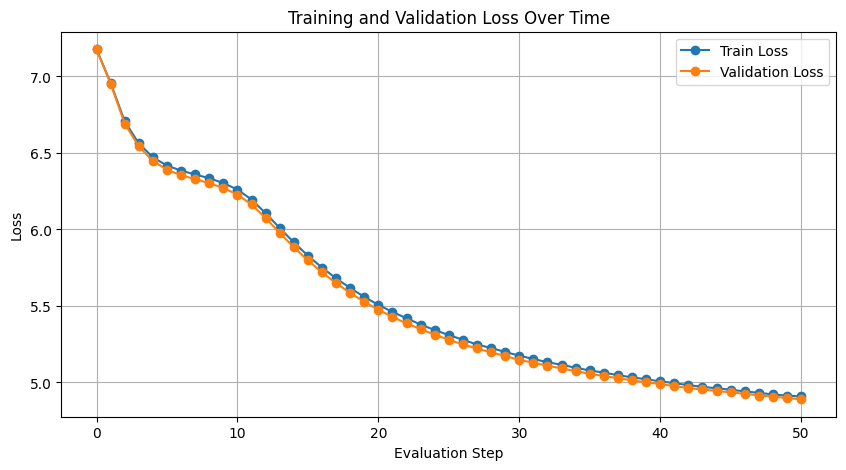

In [39]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label="Train Loss", marker='o')
plt.plot(val_losses, label="Validation Loss", marker='o')
plt.xlabel("Evaluation Step")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Time")
plt.legend()
plt.grid()
plt.show()